In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Note: 2011-2013 represent top 100 billed services. 2014-2017 represent all billed services
data_2011= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
data_2012= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
data_2013= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
data_2014= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
data_2015= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"
data_2016= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv"
data_2017= "../data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2017.csv"

# Read School and Student Data File and store into Pandas Data Frames
data_2011_df = pd.read_csv(data_2011, low_memory = False)
data_2012_df = pd.read_csv(data_2012, low_memory = False)
data_2013_df = pd.read_csv(data_2013, low_memory = False)
data_2014_df = pd.read_csv(data_2014, low_memory = False)
data_2015_df = pd.read_csv(data_2015, low_memory = False)
data_2016_df = pd.read_csv(data_2016, low_memory = False)
data_2017_df = pd.read_csv(data_2017, low_memory = False)

In [3]:
# Renaming columns so relevant data for merge identified by year
years_2011_df = data_2011_df.rename(columns = {"Total Discharges":"2011 Total Discharges",
                                                "Average Covered Charges":"2011 Average Covered Charges"})
years_2012_df = data_2012_df.rename(columns = {"Total Discharges":"2012 Total Discharges",
                                                "Average Covered Charges":"2012 Average Covered Charges"})
years_2013_df = data_2013_df.rename(columns = {"Total Discharges":"2013 Total Discharges",
                                                "Average Covered Charges":"2013 Average Covered Charges"})
years_2014_df = data_2014_df.rename(columns = {"Total Discharges":"2014 Total Discharges",
                                                "Average Covered Charges":"2014 Average Covered Charges"})
years_2015_df = data_2015_df.rename(columns = {"Total Discharges":"2015 Total Discharges",
                                                "Average Covered Charges":"2015 Average Covered Charges"})
years_2016_df = data_2016_df.rename(columns = {"Total Discharges":"2016 Total Discharges",
                                                "Average Covered Charges":"2016 Average Covered Charges"})
years_2017_df = data_2017_df.rename(columns = {"Total Discharges":"2017 Total Discharges",
                                                "Average Covered Charges":"2017 Average Covered Charges"})

In [4]:
years_2011_df['DRG Definition'].value_counts()

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
                                                                            ... 
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                859
473 - CERVICAL SPINAL FUSION W/O CC/MCC                                      846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC                 727
885 - PSYCHOSES                                                              613
Name: DRG Definition, Length: 100, dtype: int64

In [5]:
# Preparing for merge by maintaining only relevant columns - almost all for 2011 which becomes the base
short_2011_df = years_2011_df.iloc[:,0:10]
short_2012_df = years_2012_df[["DRG Definition","Provider Id","2012 Total Discharges","2012 Average Covered Charges"]]
short_2013_df = years_2013_df[["DRG Definition","Provider Id","2013 Total Discharges","2013 Average Covered Charges"]]
short_2014_df = years_2014_df[["DRG Definition","Provider Id","2014 Total Discharges","2014 Average Covered Charges"]]
short_2015_df = years_2015_df[["DRG Definition","Provider Id","2015 Total Discharges","2015 Average Covered Charges"]]
short_2016_df = years_2016_df[["DRG Definition","Provider Id","2016 Total Discharges","2016 Average Covered Charges"]]
short_2017_df = years_2017_df[["DRG Definition","Provider Id","2017 Total Discharges","2017 Average Covered Charges"]]
short_2016_df = short_2016_df.replace(
                        {'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC'\
                         :'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})
short_2017_df = short_2017_df.replace(
                        {'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC'\
                         :'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC'})
len(short_2011_df.index)

163065

In [6]:
# merging 2011 and 2012 for rows with same procedure and provider
master_df=pd.merge(short_2011_df,short_2012_df,how='inner',on=['DRG Definition','Provider Id'])

In [7]:
# merging master and 2013 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2013_df,how='inner',on=['DRG Definition','Provider Id'])

In [8]:
# merging master and 2014 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2014_df,how='inner',on=['DRG Definition','Provider Id'])

In [9]:
# merging master and 2015 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2015_df,how='inner',on=['DRG Definition','Provider Id'])

In [10]:
# merging master and 2016 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2016_df,how='inner',on=['DRG Definition','Provider Id'])

In [11]:
# merging master and 2017 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2017_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,...,2013 Total Discharges,2013 Average Covered Charges,2014 Total Discharges,2014 Average Covered Charges,2015 Total Discharges,2015 Average Covered Charges,2016 Total Discharges,2016 Average Covered Charges,2017 Total Discharges,2017 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,...,98.0,37988.97959,93,36003.63441,80,37027.24,60,"$38,026.17",41,41130.56098
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,...,34.0,15554.88235,50,16531.14000,39,16225.77,37,"$14,381.38",37,14450.08108
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,...,30.0,40380.10000,43,42026.81395,26,40792.27,32,"$42,484.94",19,35486.57895
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,...,17.0,22026.23529,14,15765.35714,29,21320.93,26,"$17,585.69",20,20318.20000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,...,17.0,45663.05882,21,47583.61905,18,40520.17,14,"$50,807.86",16,57239.62500


In [12]:
len(master_df.index)

91105

In [13]:
# master_df['DRG Definition'].unique()

In [14]:
# count of unique procedures
procedure_count=len(master_df['DRG Definition'].unique())
hospital_count=len(master_df['Provider Id'].unique())

print(f'There are {procedure_count} unique procedures each performed by all \
{hospital_count} unique hospitals in the combined database across seven years')

There are 87 unique procedures each performed by all 2965 unique hospitals in the combined database across seven years


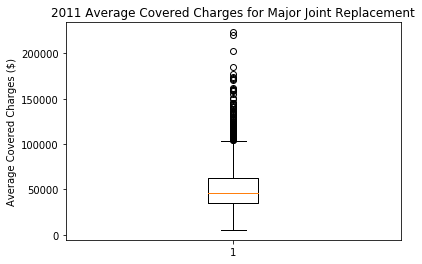

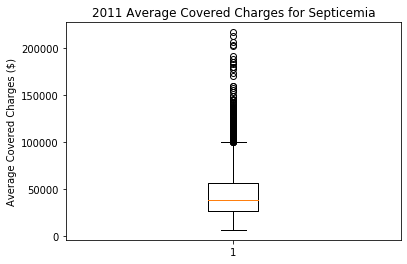

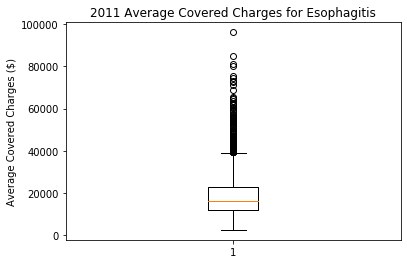

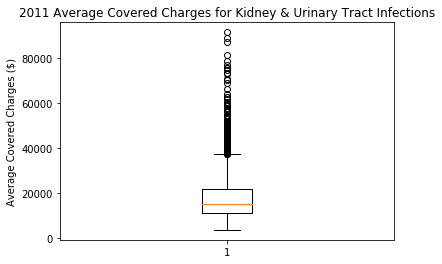

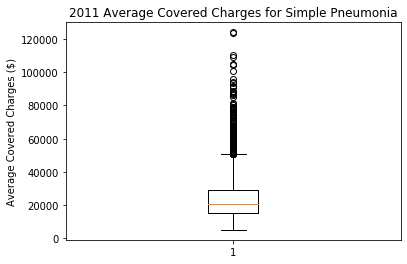

Average covered charge values above 103904.63397375 could be outliers for procedure 470.
Average covered charge values above 100332.9253025 could be outliers for procedure 871.
Average covered charge values above 39230.779355000006 could be outliers for procedure 392.
Average covered charge values above 37574.110570000004 could be outliers for procedure 690.
Average covered charge values above 50590.60669 could be outliers for procedure 194.
Average covered charge values below -6592.348296249991 could be outliers for procedure 470.
Average covered charge values below -17108.28857750001 could be outliers for procedure 871.
Average covered charge values below -4105.308885000006 could be outliers for procedure 392.
Average covered charge values below -4334.799670000002 could be outliers for procedure 690.
Average covered charge values below -6382.537110000001 could be outliers for procedure 194.


In [17]:
# Creating Box Plots and Determing Range for Potential Outliers in 2011
procedures = [470,871,392,690,194]
procedure_names = [
    '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC',\
    '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC',\
    '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',\
    '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC',\
    '194 - SIMPLE PNEUMONIA & PLEURISY W CC']
short_procedure_names = [
    'Major Joint Replacement',
    'Septicemia',
    'Esophagitis',
    'Kidney & Urinary Tract Infections',
    'Simple Pneumonia'
]

upper_bounds=[]
lower_bounds=[]

for x in range(len(procedures)):
    average_charges_df = data_2011_df.loc[(data_2011_df['DRG Definition']==\
                        f'{procedure_names[x]}'),:]
    average_charges = average_charges_df['Average Covered Charges']

    fig1, ax1 = plt.subplots()
    ax1.set_title(f'2011 Average Covered Charges for {short_procedure_names[x]}')
    ax1.set_ylabel('Average Covered Charges ($)')
    ax1.boxplot(average_charges)
    plt.show()
    
    quartiles = average_charges_df['Average Covered Charges'].quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr = upperq-lowerq
    upper_bound = upperq+(1.5*iqr)
    lower_bound = lowerq-(1.5*iqr)
    upper_bounds.append(upper_bound)
    lower_bounds.append(lower_bound)
    
for x in range(len(upper_bounds)):
        print(f"Average covered charge values above {upper_bounds[x]} could be outliers for procedure {procedures[x]}.")
    
for x in range(len(lower_bounds)):
        print(f"Average covered charge values below {lower_bounds[x]} could be outliers for procedure {procedures[x]}.")

In [ ]:
# This won't work until 2016 data types are fixed above

# Calculating tatal number for a procedure at a hospital over 7 years

# total_discharges = master_df["2011 Total Discharges"]+master_df["2012 Total Discharges"]\
#                     +master_df["2013 Total Discharges"]+master_df["2014 Total Discharges"]\
#                     +master_df["2015 Total Discharges"]+master_df["2016 Total Discharges"]\
#                     +master_df["2017 Total Discharges"]

In [ ]:
# This won't work until 2016 data types are fixed above

# Calculating total costs for a procedure at a hospital over 7 years

# total_cost = master_df["2011 Total Discharges"]*master_df["2011 Average Covered Charges"]\
#             +master_df["2012 Total Discharges"]*master_df["2012 Average Covered Charges"]\
#             +master_df["2013 Total Discharges"]*master_df["2013 Average Covered Charges"]\
#             +master_df["2014 Total Discharges"]*master_df["2014 Average Covered Charges"]\
#             +master_df["2015 Total Discharges"]*master_df["2015 Average Covered Charges"]\
#             +master_df["2016 Total Discharges"]*master_df["2016 Average Covered Charges"]\
#             +master_df["2017 Total Discharges"]*master_df["2017 Average Covered Charges"]

In [ ]:
# This won't work until 2016 data types are fixed above 

# Calculating tatal average cost per procedure for a specific procedure at a hospital over 7 years

# total_avg_cost = total_cost / total_discharges

In [ ]:
# This won't work until 2016 data types are fixed above

# Inserting new columns into data frame

# master_df["Total Discharges"] = total_discharges
# master_df["Total Cost"] = total_cost
# master_df["Seven-Year Average Cost per Procedure"] = total_avg_cost

# check to make sure columns are inserted at end of dataframe and are calculating correctly
# master_df.head()


In [ ]:
# Next steps 
# add a column with abreviated zip codes - first three digits of zip code
# bring in census data for median income per 3 digit zip code
# add column to the end with census data